<a href="https://colab.research.google.com/github/jeyanthan-gj/NLP-AND-LLM/blob/main/GloVe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧠 What is GloVe and Why Do We Use It?

**GloVe (Global Vectors for Word Representation)** is a word embedding technique that converts words into numerical vectors such that **words with similar meanings have similar vector representations**.

Unlike traditional methods that only count word occurrences, GloVe learns word meaning by analyzing **global word co-occurrence statistics** across an entire text corpus.

### Why GloVe is Used
- To capture **semantic relationships** between words  
- To represent words in a **dense, continuous vector space**  
- To understand meaning based on **how words appear together globally**  
- To perform tasks like **similarity search, analogy solving, and clustering**

### Why We Use Pretrained GloVe
- Training GloVe from scratch requires **huge datasets and memory**
- Pretrained GloVe models are trained on **Wikipedia and Gigaword**
- They provide **high-quality embeddings instantly**
- Ideal for **learning, experimentation, and real-world NLP tasks**


### 📦 Install Required Library

We install **gensim**, which provides easy access to pretrained word embedding models  
such as **GloVe, Word2Vec, and FastText**.

This allows us to load high-quality pretrained embeddings without manual downloads.


In [1]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 54.0 MB/s eta 0:00:00


### 📦 Import Required Packages

In this cell:
- `gensim.downloader` is used to load pretrained models
- `numpy` is used for numerical operations on vectors


In [2]:
import gensim.downloader as api
import numpy as np


### 📚 Load Pretrained GloVe Model

Here, we load a **pretrained GloVe model** trained on  
**Wikipedia + Gigaword corpus**.

- The embeddings are **100-dimensional**
- This model already understands semantic relationships between words
- No training is required from scratch


In [3]:
# 100-dimensional GloVe embeddings
glove_model = api.load("glove-wiki-gigaword-100")


[==================================================] 100.0% 128.1/128.1MB downloaded


### 🔍 Check Vocabulary Size

This cell prints the number of unique words available in the pretrained GloVe model.

A large vocabulary means:
- Better coverage of common English words
- Higher chance of finding meaningful word relationships


In [5]:
print("Vocabulary size:", len(glove_model))


Vocabulary size: 400000


### 🚗 Find Words Similar to "car"

This cell retrieves words that are **semantically similar** to the word *car*.

The similarity is computed using **cosine similarity** between word vectors.

Words with similar meanings appear closer in vector space.


In [6]:
glove_model.most_similar("car")


[('vehicle', 0.8630837798118591),
 ('truck', 0.8597878813743591),
 ('cars', 0.837166965007782),
 ('driver', 0.8185911178588867),
 ('driving', 0.781263530254364),
 ('motorcycle', 0.7553156614303589),
 ('vehicles', 0.7462257146835327),
 ('parked', 0.74594646692276),
 ('bus', 0.737270712852478),
 ('taxi', 0.7155269384384155)]

### 👑 Find Words Similar to "king"

Here, we test whether the GloVe model understands  
**semantic and contextual relationships** around the word *king*.

We expect related words like *queen*, *prince*, or *monarch*.


In [7]:
glove_model.most_similar("king")


[('prince', 0.7682328820228577),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919989585876465),
 ('kingdom', 0.6811409592628479),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

### 📐 Measure Similarity Between Two Words

This cell calculates the **cosine similarity** between the words  
*car* and *automobile*.

- Value range: **-1 to 1**
- Higher value → words are more semantically similar


In [8]:
similarity = glove_model.similarity("car", "automobile")
print("Similarity between car and automobile:", similarity)


Similarity between car and automobile: 0.68319416


### 🎨 Reduce Dimensions for Visualization

Word embeddings exist in **high-dimensional space (100D)**.

To visualize them:
- We use **PCA (Principal Component Analysis)**
- PCA reduces vectors from 100D → 2D
- This makes relationships visible on a 2D plot


### 📊 Visualize Word Embeddings

This cell plots selected words in **2D vector space**.

Words with similar meanings appear:
- **Closer together**
- Form meaningful clusters

This visualization helps us intuitively understand  
how GloVe captures semantic relationships.


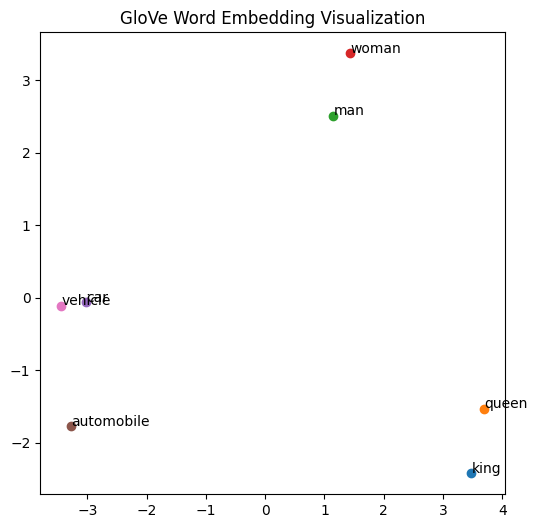

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ["king", "queen", "man", "woman", "car", "automobile", "vehicle"]
vectors = np.array([glove_model[word] for word in words])

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(6, 6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0] + 0.01, reduced[i, 1] + 0.01, word)

plt.title("GloVe Word Embedding Visualization")
plt.show()


### ✅ Key Takeaways

- GloVe converts words into dense numerical vectors
- Uses **global word co-occurrence statistics**
- Captures strong semantic relationships
- Pretrained embeddings save time and computation
- Forms the foundation for modern NLP models
